In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import plotly.express as px
import plotly.io as pio
import plotly
%matplotlib inline

In [2]:
df = pd.read_excel ('default of credit card clients.xls',header = 1,index_col = 'ID')

In [3]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [4]:
df.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
# no missing value
df.isna().sum().sum()

0

In [6]:
# df.drop(columns = ['ID'],inplace = True)

In [7]:
# change pay_0 to pay_1 to later graphics construction
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)
df.rename(columns={'default payment next month':'default_next_month'}, inplace=True)

In [8]:
df.shape

(30000, 24)

In [9]:
drop_id_1 = (df['EDUCATION'] != 1 ) & (df['EDUCATION'] != 2 ) & (df['EDUCATION'] != 3) & (df['EDUCATION'] != 4 )
drop_id_2 = (df['MARRIAGE'] != 1 ) & (df['MARRIAGE'] != 2 ) & (df['MARRIAGE'] != 3)
keep_id = -(drop_id_1 | drop_id_2)
df = df[keep_id]

In [10]:
df.shape

(29601, 24)

In [11]:
pay_cols = ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
pay_cols = [col.upper() for col in pay_cols]

# pay_# <0 means pay duly
for col in pay_cols:
    fil = (df[col] < 0)
    df.loc[fil, col] = 0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29601 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   LIMIT_BAL           29601 non-null  int64
 1   SEX                 29601 non-null  int64
 2   EDUCATION           29601 non-null  int64
 3   MARRIAGE            29601 non-null  int64
 4   AGE                 29601 non-null  int64
 5   PAY_1               29601 non-null  int64
 6   PAY_2               29601 non-null  int64
 7   PAY_3               29601 non-null  int64
 8   PAY_4               29601 non-null  int64
 9   PAY_5               29601 non-null  int64
 10  PAY_6               29601 non-null  int64
 11  BILL_AMT1           29601 non-null  int64
 12  BILL_AMT2           29601 non-null  int64
 13  BILL_AMT3           29601 non-null  int64
 14  BILL_AMT4           29601 non-null  int64
 15  BILL_AMT5           29601 non-null  int64
 16  BILL_AMT6           29601 non-null  int6

In [13]:
categorical_variables = ["SEX","EDUCATION","MARRIAGE","PAY_1",'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
for var in categorical_variables:
    df[var] = df[var].astype('category')
    df[var+"_code"] = df[var].cat.codes

In [14]:
df.head(4)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,default_next_month,SEX_code,EDUCATION_code,MARRIAGE_code,PAY_1_code,PAY_2_code,PAY_3_code,PAY_4_code,PAY_5_code,PAY_6_code
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,0,0,0,...,1,1,1,0,2,2,0,0,0,0
2,120000,2,2,2,26,0,2,0,0,0,...,1,1,1,1,0,2,0,0,0,1
3,90000,2,2,2,34,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
4,50000,2,2,1,37,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [15]:
scale = MinMaxScaler()
scaled = scale.fit_transform(df)
scaled_df = pd.DataFrame(scaled, columns=df.columns)

In [16]:
df.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,default_next_month,SEX_code,EDUCATION_code,MARRIAGE_code,PAY_1_code,PAY_2_code,PAY_3_code,PAY_4_code,PAY_5_code,PAY_6_code
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,0,0,0,...,1,1,1,0,2,2,0,0,0,0
2,120000,2,2,2,26,0,2,0,0,0,...,1,1,1,1,0,2,0,0,0,1
3,90000,2,2,2,34,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
4,50000,2,2,1,37,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
5,50000,1,2,1,57,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [17]:
# imbalanced dataset?
df.default_next_month.value_counts()

0    22996
1     6605
Name: default_next_month, dtype: int64

In [18]:
print("Number of default payments in the dataset:")
print(np.sum(df['default_next_month'] == 1))
print("Percentage of default payments in the dataset:")
print(np.sum(df['default_next_month'] == 1) / df.shape[0])

Number of default payments in the dataset:
6605
Percentage of default payments in the dataset:
0.2231343535691362


In [19]:
print("Number of non-default payments in the dataset:")
print(np.sum(df['default_next_month'] == 0))
print("Percentage of non-default payments in the dataset:")
print(np.sum(df['default_next_month'] == 0) / df.shape[0])

Number of non-default payments in the dataset:
22996
Percentage of non-default payments in the dataset:
0.7768656464308639


In [20]:
# split the age by groups
age_bins = [20,30,40,50,60,70,80]
age_names = ['21-30','31-40','41-50','51-60','61-70','71-80']
df['AGE_BIN'] = pd.cut(x=df.AGE, bins=age_bins, labels=age_names, right=True)

lim_bins = [5000,50000,100000,150000,200000,300000,400000,500000,1100000]
lim_names = ['5001-50000','50001-100000','100001-150000','150001-200000','200001-300000',
            '300001-400000','400001-500000','500001-1100000']
df['LIMIT_BAL_BIN'] = pd.cut(x=df.LIMIT_BAL, bins = lim_bins,labels = lim_names,right=True)

In [21]:
# default & non-default payments
df_def = df[df['default_next_month']==1]
df_nondef = df[df['default_next_month']==0]

### LIMIT_BAL

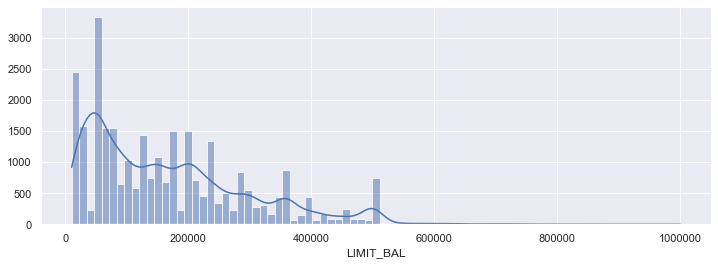

In [22]:
plt.figure(figsize=(12,4))
sns.set(font_scale=1)
sns.histplot(df['LIMIT_BAL'],kde=True)
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.ylabel('')
plt.show()

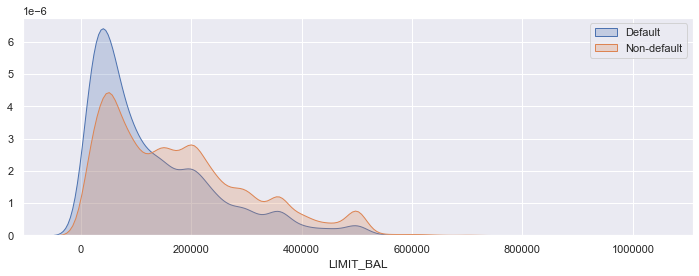

In [23]:
plt.figure(figsize=(12,4)) 
sns.set(font_scale=1)
# kernel density estimation
sns.kdeplot(df_def.LIMIT_BAL, label = 'Default', shade=True)
sns.kdeplot(df_nondef.LIMIT_BAL, label = 'Non-default', shade = True)
plt.ticklabel_format(style='plain', axis='x') 
plt.ylabel('')
plt.legend()
plt.show()

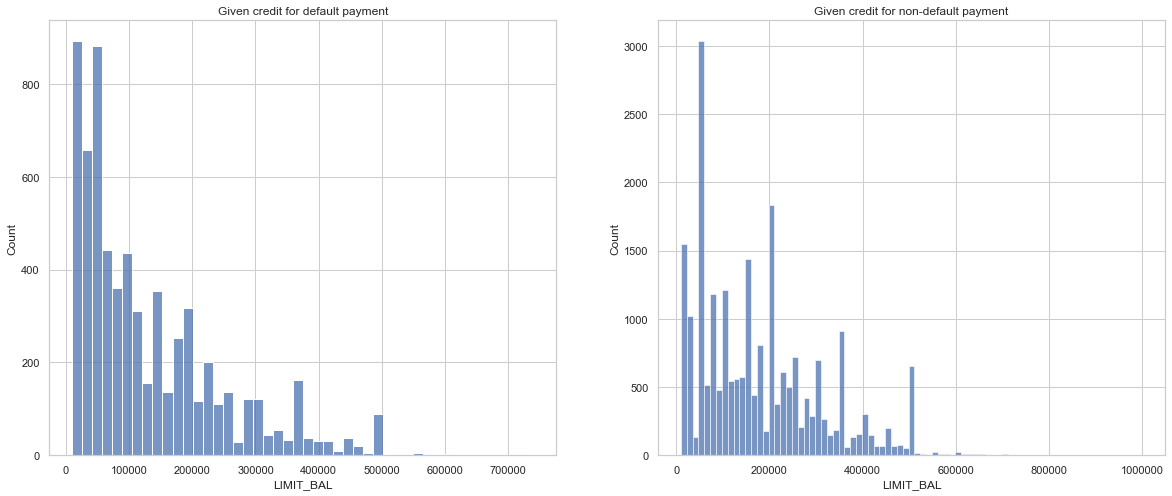

In [24]:
sns.set_style("whitegrid")
plt.subplots(figsize=(20,8))
plt.subplot(1,2,1)
sns.histplot(df_def.LIMIT_BAL)
plt.title('Given credit for default payment')
plt.subplot(1,2,2)
sns.histplot(df_nondef.LIMIT_BAL)
plt.title('Given credit for non-default payment')
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.show();

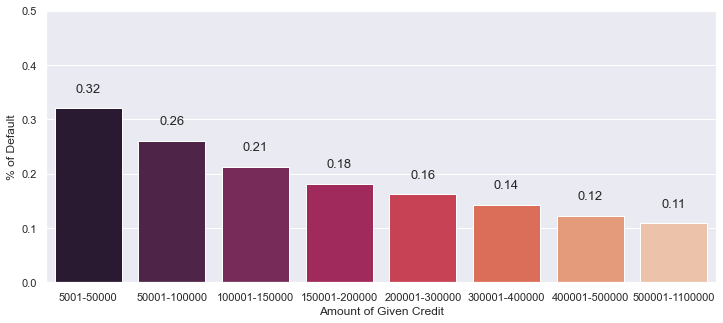

In [25]:
plt.figure(figsize=(12,5))
sns.set(font_scale=1)
ax = sns.barplot(x = 'LIMIT_BAL_BIN', y="default_next_month", data=df , palette = 'rocket', ci = None)

plt.xlabel("Amount of Given Credit", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

From the plot, we observe that the amount of given credit is right-skewed. The given credit amounts are mostly within the range of 0 to 200000.

Also holds for spliting the data into default payment and non-default payment.

In [26]:
# sex == 1: male
# sex == 2: female
# education 1-4: graduate, university, high, others
# marriage 1-3: married, single, others

### SEX

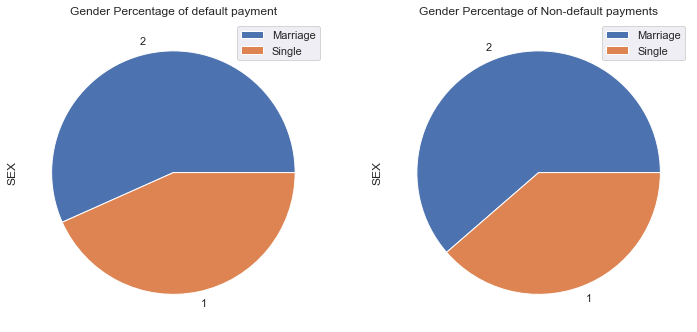

In [30]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
df_def['SEX'].value_counts().plot.pie()
labels = [r'Marriage', r'Single']
plt.legend(labels, loc="best")
plt.title('Gender Percentage of default payment')
plt.subplot(1,2,2)
df_nondef['SEX'].value_counts().plot.pie()
plt.legend(labels, loc="best")
plt.title('Gender Percentage of Non-default payments');

We see that both default payments and non-default payment of next month are mostly by female, especially in non-default group. Might not be a very useful feature to fit for our classification model, but could try it later.

### Marriage

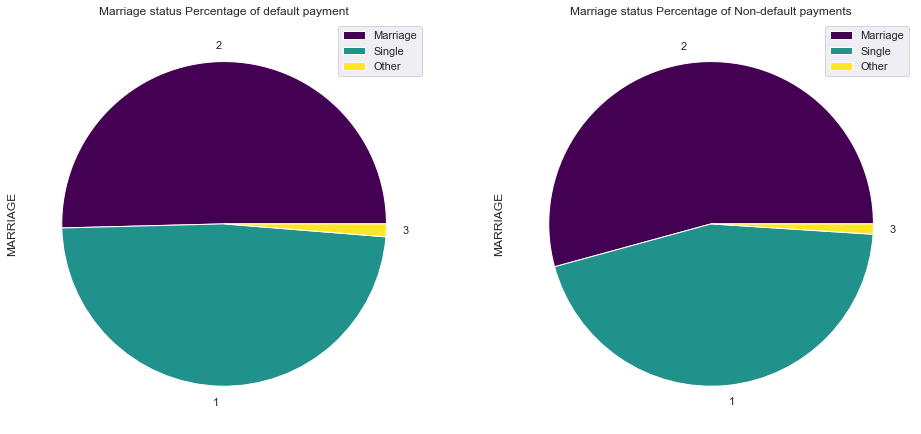

In [33]:
# 
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
df_def['MARRIAGE'].value_counts().plot.pie(cmap='viridis')
labels1 = [r'Marriage',r'Single',r'Other']
plt.legend(labels1, loc="best")
plt.title('Marriage status Percentage of default payment')
plt.subplot(1,2,2)
df_nondef['MARRIAGE'].value_counts().plot.pie(cmap='viridis')
plt.legend(labels1, loc="best")
plt.title('Marriage status Percentage of Non-default payments');

### Sex & Marriage

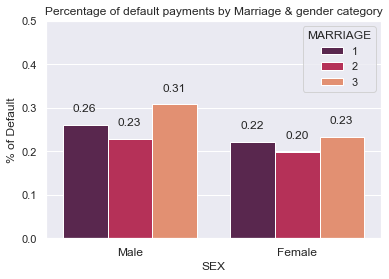

In [24]:
sns.set(font_scale=1)
ax = sns.barplot(x = "SEX", y = "default_next_month", hue = "MARRIAGE", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.06, p.get_height()+0.03),fontsize=12)
plt.title('Percentage of default payments by Marriage & gender category')
plt.show()

Married people tend to have higher probability to default, could be a useful feature.

### Education

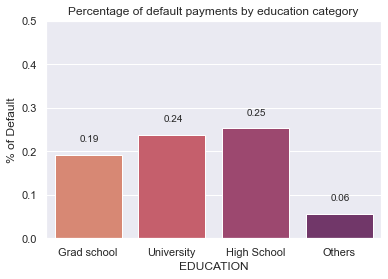

In [34]:
sns.set(font_scale=1)
ax = sns.barplot(data=df, x='EDUCATION', y="default_next_month",palette = 'flare' , ci=None)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3],['Grad school', 'University', 'High School','Others'],fontsize=11)
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03), fontsize=10)
plt.title('Percentage of default payments by education category')

plt.show()

### Education & Sex

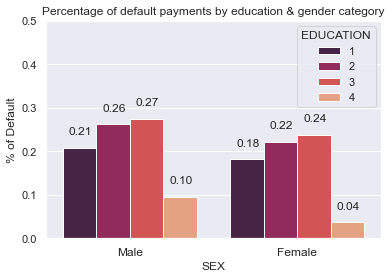

In [36]:
sns.set(font_scale=1)
ax = sns.barplot(data = df,x = "SEX", y = "default_next_month", hue = "EDUCATION", palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.035, p.get_height()+0.03),fontsize=12)
plt.title('Percentage of default payments by education & gender category')
plt.show()

From the plot we see that there's a high proportion of customers who have very high bill amount but did not make the same amount of payments in the past six months. 

From the plot, we see that female tend to have higher probability to default for next month

In [86]:
# default & non-default
df.AGE_BIN.value_counts()

21-30    10899
31-40    10564
41-50     5906
51-60     1963
61-70      254
71-80       15
Name: AGE_BIN, dtype: int64

### Age

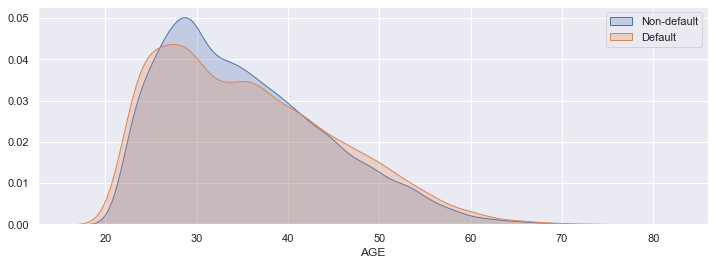

In [38]:
sns.set(font_scale=1)
plt.figure(figsize=(12,4))
sns.kdeplot(df_nondef.AGE, label='Non-default', shade=True) # kernel density estiamtion 
sns.kdeplot(df_def.AGE ,label='Default', shade=True)
plt.ticklabel_format(style='plain', axis='x') 
plt.ylabel('')
plt.legend()
plt.show()

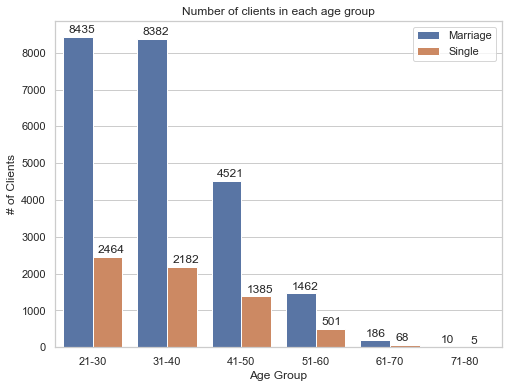

In [36]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
ax=sns.countplot(data=df, x='AGE_BIN', hue='default_next_month');
labels2 = [r'Default',r'Non-default']
plt.legend(labels, loc="best")
plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+100))
plt.title("Number of clients in each age group");

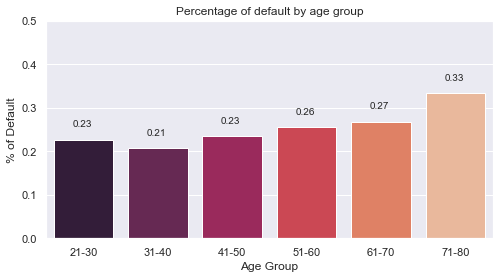

In [50]:
plt.figure(figsize=(8,4))
sns.set(font_scale=1)
ax = sns.barplot(x = 'AGE_BIN', y="default_next_month", data=df , palette = 'rocket', ci = None)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=10)
plt.title('Percentage of default by age group')
plt.show()

From the plot,we see that the number of default payments is decreasing with the age, age could be a useful feature to predict for the default behavior for next month.

### BILL_AMT  VS. Payments

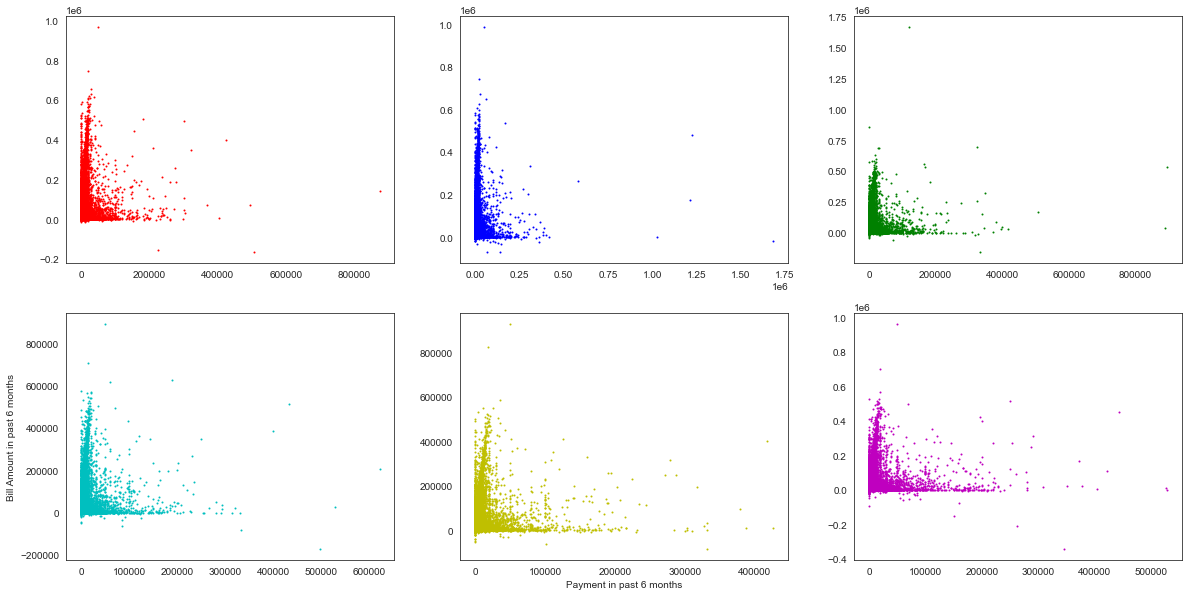

In [132]:
sns.set_style('white')
plt.subplots(figsize=(20,10))

plt.subplot(2,3,1)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT1, c='r', s=1)

plt.subplot(2,3,2)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT2, c='b', s=1)

plt.subplot(2,3,3)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT3, c='g', s=1)

plt.subplot(2,3,4)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT4, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months")

plt.subplot(2,3,5)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT5, c='y', s=1)
plt.xlabel("Payment in past 6 months")

plt.subplot(2,3,6)
plt.scatter(x=df.PAY_AMT6, y=df.BILL_AMT6, c='m', s=1)

plt.show()

In [80]:
df.PAY_1.value_counts()

0    22840
1     3662
2     2640
3      320
4       76
5       24
8       19
6       11
7        9
Name: PAY_1, dtype: int64

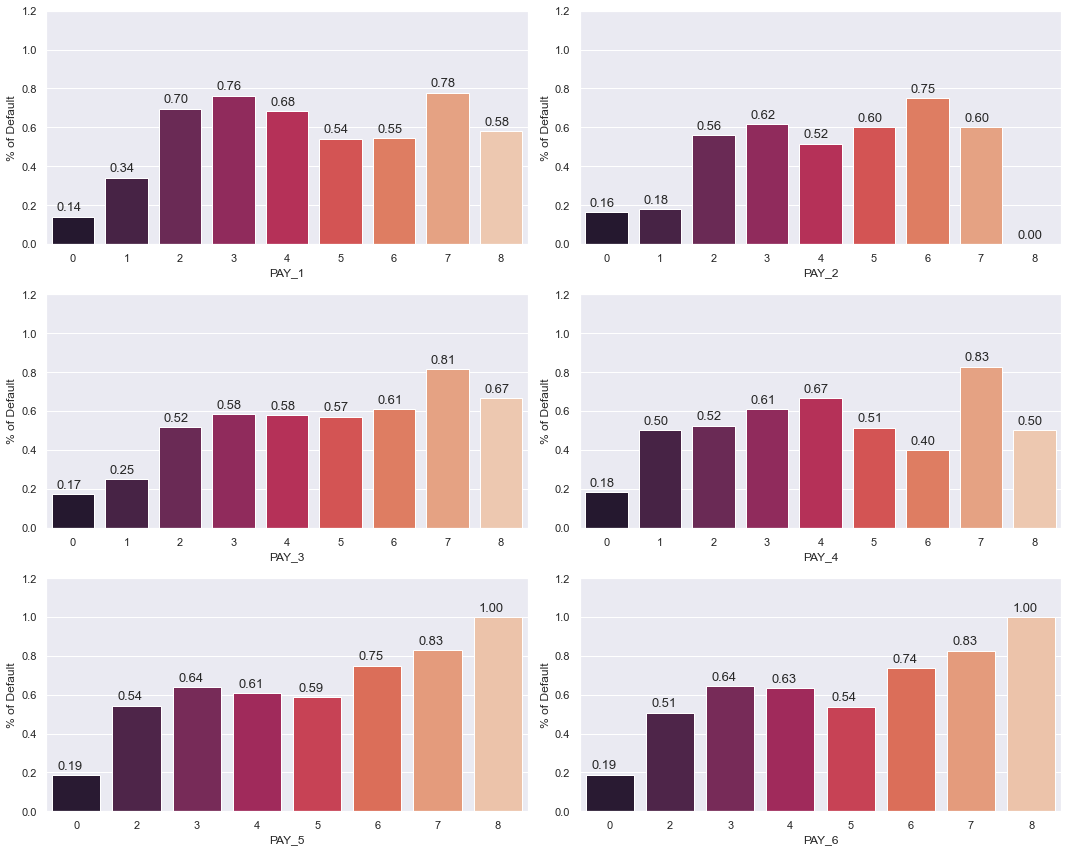

In [93]:
pays = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize=(15,12))
sns.set(font_scale=1)
for i,col in enumerate(pays):
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x=col, y="default_next_month", data=df, palette = 'rocket', ci = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,1.2)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.09, p.get_height()+0.03),fontsize=13)
plt.show()

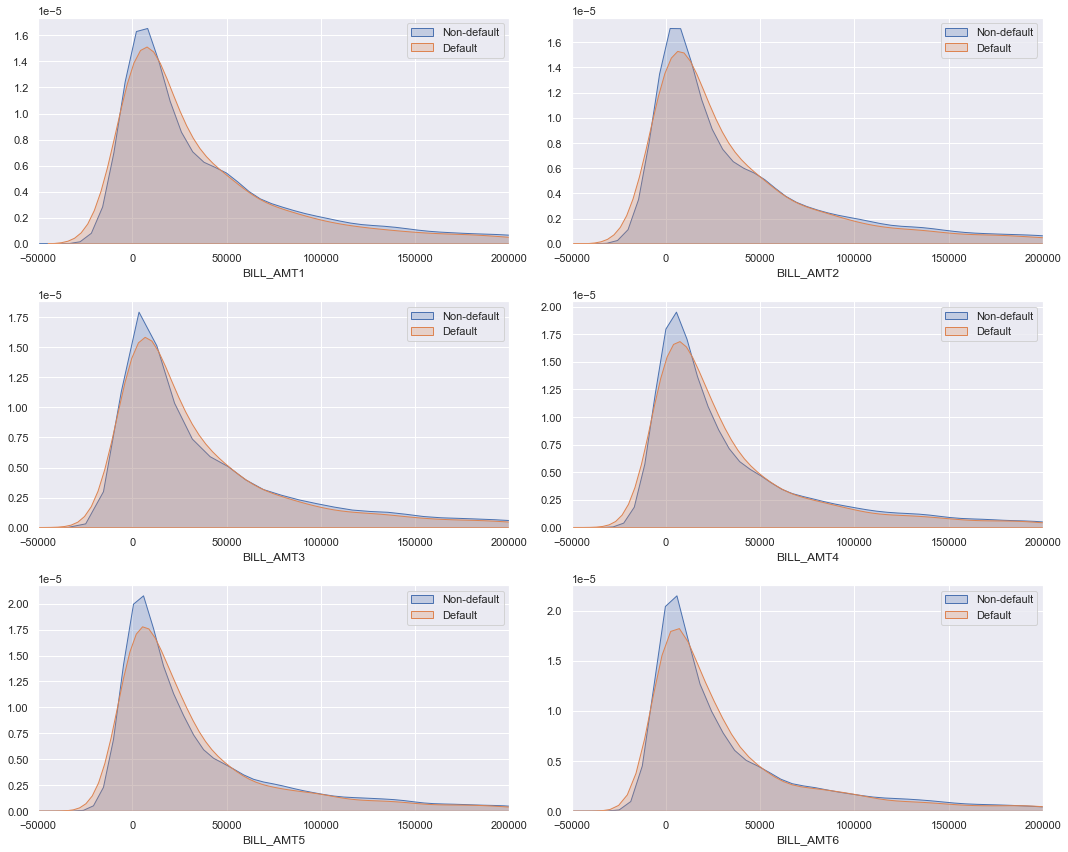

In [96]:
bills = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
plt.figure(figsize=(15,12))
sns.set(font_scale=1)
for i,col in enumerate(bills):
    plt.subplot(3,2,i+1)
    sns.kdeplot(df_nondef.loc[:,col], label = 'Non-default', shade=True)
    sns.kdeplot(df_def.loc[:,col], label = 'Default', shade = True)
    plt.xlim(-50000,200000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()
plt.show()